In [8]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from pydmd import DMD, BOPDMD
from pydmd.plotter import plot_eigs, plot_summary
from pydmd.preprocessing import hankel_preprocessing

In [105]:
data = np.load("../data/processed_extrapolation.npy", allow_pickle=True)
E = data[()]['data'][:,1:]
h_omega = np.array(data[()]['data'][:,0])
N_Max = data[()]['Nmax'].reshape([-1])
n_points = h_omega.shape[0]

Frequencies (imaginary component): [ 0.03617602+0.j          0.00688582+0.j         -0.17453251+0.13142579j
 -0.17453251-0.13142579j]


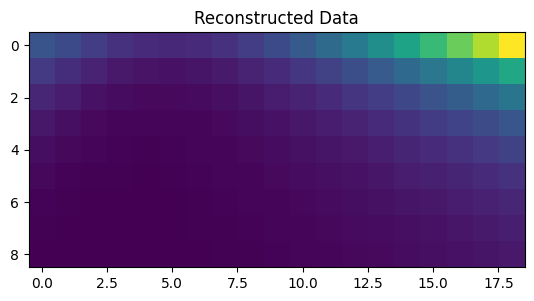

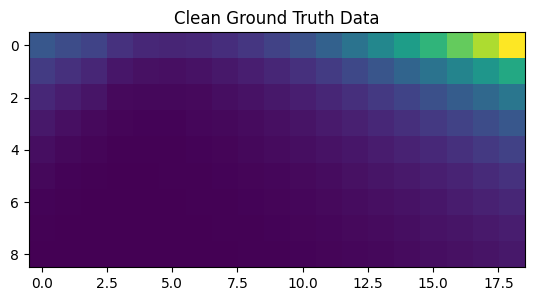

In [111]:
dt = N_Max[1] - N_Max[0]  # time step between each snapshot
X = E

d = 2
#dmd = BOPDMD(svd_rank=4, num_trials=0)
#delay_t = N_Max[: -d + 1]
dmd = DMD(svd_rank=4)
dmd = hankel_preprocessing(dmd, d=d)
dmd.fit(X.T)
# plot_summary(dmd, x=h_omega, y=N_Max, t=dt, d=d)
print(
    f"Frequencies (imaginary component): {np.round(np.log(dmd.eigs) / dt, decimals=12)}"
)
plt.title("Reconstructed Data")
plt.imshow(dmd.reconstructed_data.real)
plt.show()
plt.title("Clean Ground Truth Data")
plt.imshow(X.T)
plt.show()

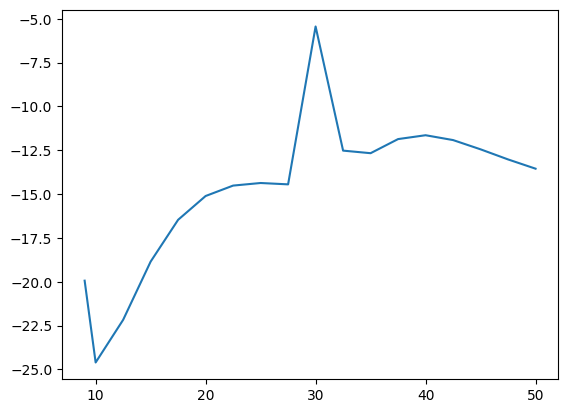

In [119]:
Nmax6 = X.T[1,1:]
Nmax8 = X.T[2,1:]
prediction = dmd.predict(Nmax6).real
plt.plot(h_omega[1:], prediction)